# <center>Solución Puntos Prueba de Conocimientos</center>
Nombre: John Erick Cabrera Ramirez

# 1) Método de Newton-Raphson

## En esta primera parte importamos las librerías que necesitaremos

In [82]:
import numpy as np
import matplotlib.pyplot as plt 

* El siguiente comando es para numerar ecuaciones

In [83]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

## Explicación del Método

El método de Newton Raphson es uno de los métodos numéricos utilizados para encontrar las raíces de una función o de un conjunto de puntos dado. Este método se basa en la aproximación de la derivada de una función a su recta secante. Por ejemplo, si queremos hallar la derivada numérica de la función $f(x)$ en el punto $x=x_0$ la aproximación toma la forma:
\begin{equation}\label{eq:1}
\frac{\mathrm{d}f}{\mathrm{d}x}\approx\frac{f(x)-f(x_0)}{x-x_0}
\end{equation}
En este caso es de nuestro interés hallar los ceros de una función o un conjunto de puntos, es decir, queremos hallar un valor $x^{*}$ tal que:
\begin{equation} \label{eq:2}
f(x^{*})=0
\end{equation}
Para encontrar el valor de $x^{*}$ que cumple esta condición vamos a reemplazar esta condición en la \ref{eq:1} y despejamos $x^{*}$:
\begin{equation}\label{eq:3}
f'(x)\approx\frac{f(x)-0}{x-x_0}
\end{equation}
Despejando $x^{*}$:
\begin{equation}\label{eq:4}
x^{*}\approx x-\frac{f(x)}{f'(x)}
\end{equation}
Si conocemos un valor inicial $x_0$ y su derivada  $f'(x_0)$, el cual esperamos se encuentre cerca al cero, entonces podemos hallar una aproximación al valor correcto de $x^{*}$, llamemos al valor de la aproximación $x_1$, entonces:
\begin{equation}\label{eq:5}
x_1=x_0-\frac{f(x_0)}{f'(x_0)}
\end{equation}
Este nuevo valor de $x_1$ da una nueva aproximación de $x^{*}$ que es mejor que $x_0$. Si ahora reemplazamos este valor en la aproximación \ref{eq:3}, obtendremos otro valor más cercano a $x^{*}$:
\begin{equation}\label{eq:6}
x_2=x_1-\frac{f(x_1)}{f'(x_1)}
\end{equation}
Iterando $n$ veces este procedimiento se llegará a un mejor estimativo de uno de los ceros de la función f(x):
\begin{equation}\label{eq:7}
x_{n+1}=x_{n}-\frac{f(x_n)}{f'(x_n)}
\end{equation}

## Implementación del Método

* definimos nuestra función de ejemplo

In [84]:
def f(x):
    return (x+2)*(x-2)*(x-4)

* Si lo deseas puedes usar el módulo de sympy para hallar la derivada algebraica de una función o hacerlo manualmente

In [85]:
import sympy as sp
X, Y, Z = sp.symbols('X Y Z')
sp.diff((X+2)*(X-2)*(X-4),X)

(X - 4)*(X - 2) + (X - 4)*(X + 2) + (X - 2)*(X + 2)

* definimos la derivada de nuestra función 

In [86]:
def f_d(x):
    return (x-4)*(x-2)+(x-4)*(x+2)+(x-2)*(x+2)

## Definimos la iteracion del método de Newton según la ecuación (7)

In [87]:
def iteracion(x):
    return x-f(x)/f_d(x)

## Opción 1: Con nuestra intuición adivinamos las raices de la función que tenemos

### definimos la función que calcula la aproximación a la raíz o cero por el método newton-raphson dada la aproximación inicial y el número máximo de iteraciones deseadas.
Observemos la importancia del for y de la variable temporal $x_{tmp}$ para guardar el valor siguiente de la iteracion (resultado de la función iteracion) en el valor de la variable temporal.

In [88]:
def newton(x_0,n_max):
    x_tmp=x_0
    for n in range(n_max+1):
        x_tmp=iteracion(x_tmp)
        #imprime cada valor que se obtenga en la iteracion
        print("x_{}={}".format(n,x_tmp))
    return x_tmp

In [89]:
ceros=[]

In [90]:
# Primer valor intuido de x_0

In [91]:
x_0=1.1
n_max=5
ceros.append(newton(x_0,n_max))

x_0=1.9823336968375136
x_1=1.9999240161229848
x_2=1.9999999985567771
x_3=2.0
x_4=2.0
x_5=2.0


In [92]:
# Segundo valor intuido de x_0

In [93]:
x_0=-3
n_max=5
ceros.append(newton(x_0,n_max))

x_0=-2.25531914893617
x_1=-2.0233829550564457
x_2=-2.0002244933798234
x_3=-2.0000000209958806
x_4=-2.0
x_5=-2.0


In [94]:
# Tercer valor intuido de x_0

In [95]:
x_0=6
n_max=5
ceros.append(newton(x_0,n_max))

x_0=4.857142857142858
x_1=4.255639097744361
x_2=4.034152889374028
x_3=4.0007498862879505
x_4=4.000000374581999
x_5=4.000000000000093


# Imprimimos las tres raices encontradas:

In [100]:
ceros

[2.0, -2.0, 4.000000000000093]

## Graficamos los ceros

In [110]:
x=np.linspace(-20,19,40)
y_ceros=[]
for i in range(len(ceros)):
    y_ceros.append(f(ceros[i]))

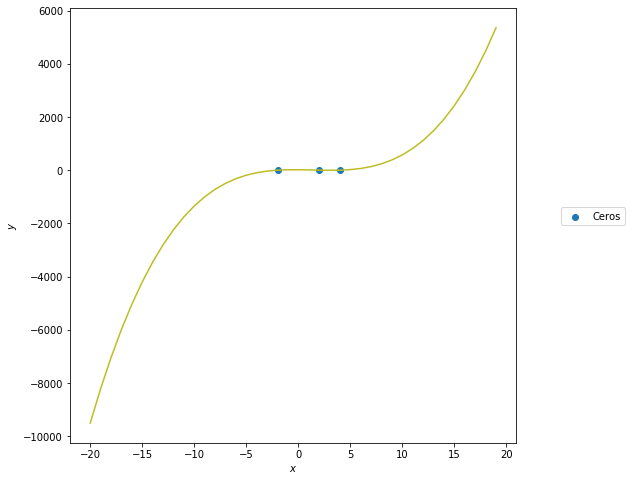

In [112]:

plt.figure(figsize=(8,8))
#Gráfica:
plt.plot(x,f(x),color='tab:olive')
plt.scatter(ceros,y_ceros,label="Ceros")
plt.xlabel("$x$")#Etiquetas de los ejes en latex
plt.ylabel("$y$") #Etiquetas de los ejes en latex
plt.legend(loc=(1.1/1,2./4)) #Para colocar la leyenda